In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
directory = '../data/raw/logs/throughput'

In [3]:
def get_log_files(pattern):
    result = []
    for filename in os.listdir(directory):
        data_size = re.search(pattern, filename)
        if data_size:
            result.append((data_size[1], filename))
    return result

In [4]:
def get_kafka_log_files():
    return get_log_files("kafka_producer_log_(\d+).csv")

In [5]:
def get_rembrandt_log_files():
    return get_log_files("rembrandt_producer_log_(\d+).csv")

In [6]:
def create_dataframe(log_files):
    joined_df = pd.DataFrame()
    for data_size, filename in log_files:
        df  = pd.read_csv(directory + "/" + filename, sep='\t')
        df["Message Size in Bytes"] = int(data_size)
        df = df[df["Number of Messages"] != 0]
        joined_df = pd.concat([joined_df, df])
    return joined_df

In [7]:
kafka_log_files = get_kafka_log_files()

In [8]:
kafka_df = create_dataframe(kafka_log_files)

In [13]:
def plot_histogram(dataframe):
    fig_dims = (18, 12)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.set(font_scale=2)
    sns.barplot(x="Message Size in Bytes", y="Throughput in MB/s", data=dataframe, ax=ax, ci="sd")

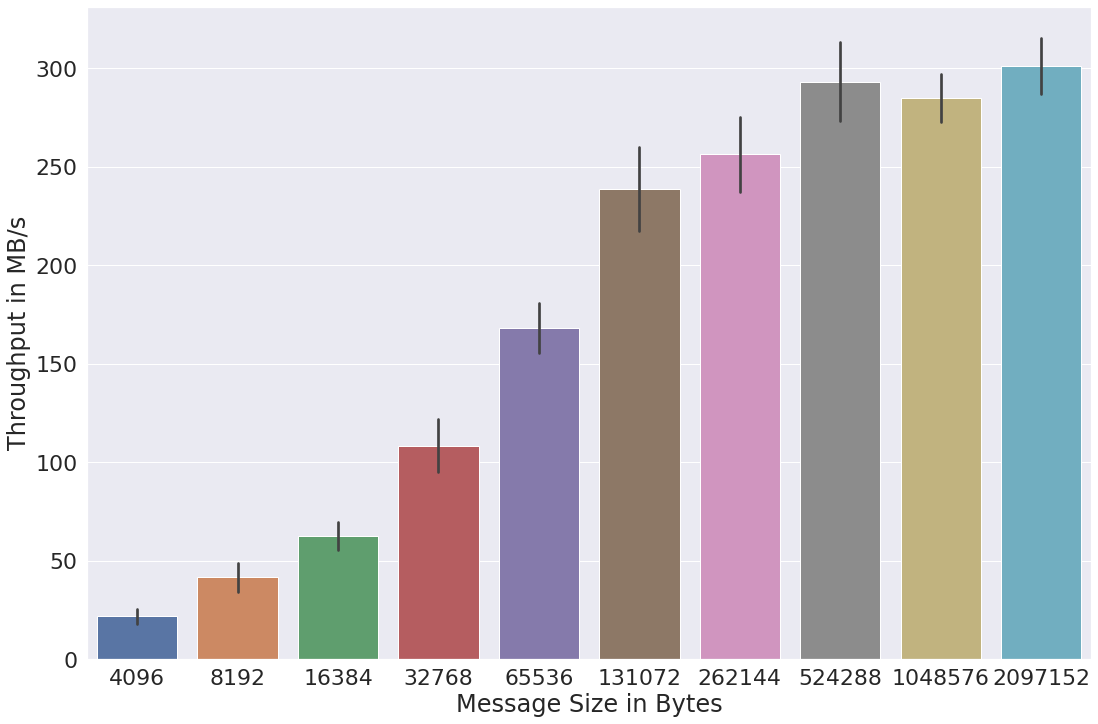

In [14]:
plot_histogram(kafka_df)

In [15]:
df[df["Message Size in Bytes"] == 131072]["Throughput in MB/s"].plot()

NameError: name 'df' is not defined

In [16]:
rembrandt_log_files = get_rembrandt_log_files()
rembrandt_df = create_dataframe(rembrandt_log_files)

In [27]:
def plot_histogram(kafka_df, rembrandt_df):
    kafka_df["Broker"] = "Kafka"
    rembrandt_df["Broker"] = "Prototype"
    df = pd.concat([kafka_df, rembrandt_df])
    fig_dims = (18, 12)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.set(font_scale=2)
    sns_plot = sns.barplot(x="Message Size in Bytes", y="Throughput in MB/s", hue="Broker", data=df, ax=ax, ci="sd")
    fig.savefig("throughput.png")

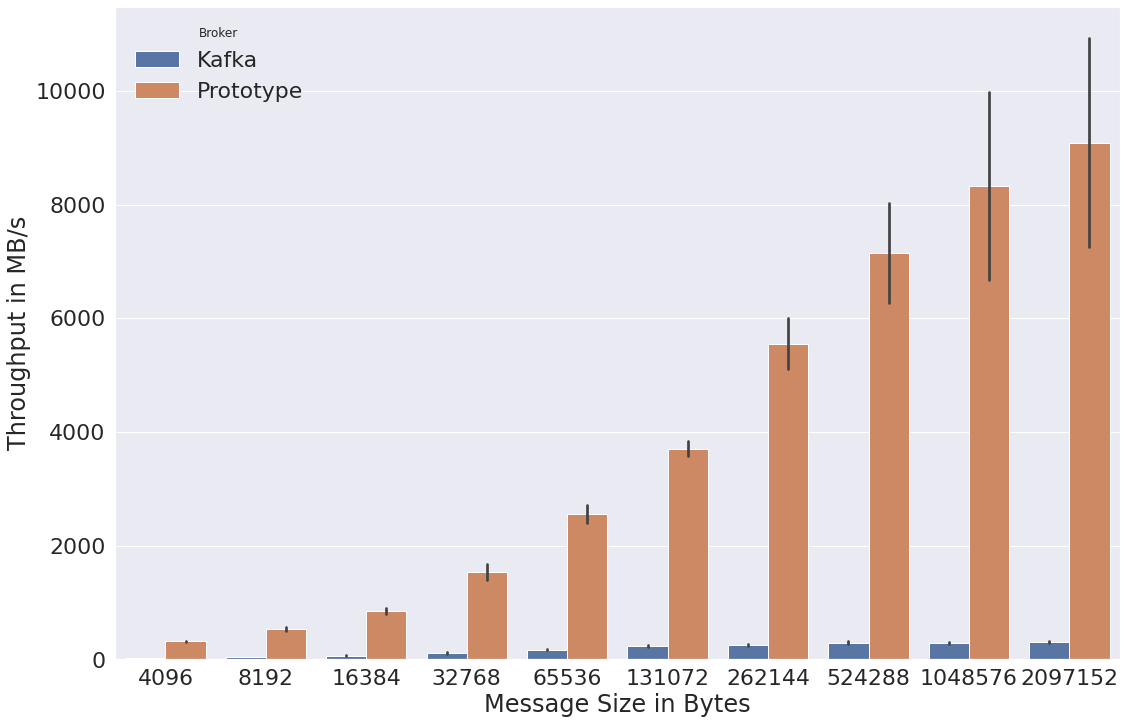

In [28]:
plot_histogram(kafka_df, rembrandt_df)

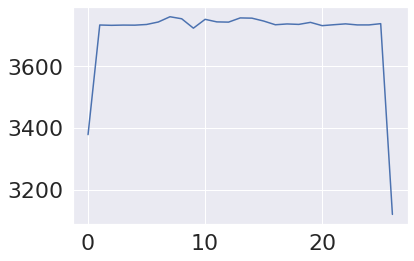

In [30]:
rembrandt_df[rembrandt_df["Message Size in Bytes"] == 131072]["Throughput in MB/s"].plot()